In [1]:
# Libraries 
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# So the notebook doesn't yell at me
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Zillow .py stuff and functions
#from acquire 
#from prepare 

#Some stuff I might have forgotten
#import env
#from env import user, password, host
from scipy import stats



# sklearn modeling stuff
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SequentialFeatureSelector
from sklearn.model_selection import train_test_split
#from evaluate import select_kbest_feature_engineering, rfe_feature_engineering
#from evaluate import scaled_data, assessed_value_regression_plot, baseline_vs_model_regression
from scipy.stats import pearsonr, spearmanr

from sklearn.model_selection import train_test_split

from math import sqrt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor



# Acquisition
- read from url csv

In [2]:
df = pd.read_csv('https://query.data.world/s/r6psulerzbz7pdb2vctbrfig5rx6fi')
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [3]:
df.shape

(1586614, 13)

In [4]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [6]:
df.describe().T
# The average of the beer_abv column seems high. I will have to check for outliers.

,count,mean,std,min,25%,50%,75%,max
brewery_id,1586614.0,3.130099e+03,5.578104e+03,1.000000e+00,1.430000e+02,4.290000e+02,2.372000e+03,2.800300e+04
review_time,1586614.0,1.224089e+09,7.654427e+07,8.406720e+08,1.173224e+09,1.239203e+09,1.288568e+09,1.326285e+09
review_overall,1586614.0,3.815581e+00,7.206219e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_aroma,1586614.0,3.735636e+00,6.976167e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_appearance,1586614.0,3.841642e+00,6.160928e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palate,1586614.0,3.743701e+00,6.822184e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_taste,1586614.0,3.792860e+00,7.319696e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
beer_abv,1518829.0,7.042387e+00,2.322526e+00,1.000000e-02,5.200000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerid,1586614.0,2.171279e+04,2.181834e+04,3.000000e+00,1.717000e+03,1.390600e+04,3.944100e+04,7.731700e+04


In [7]:
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

# Preparation 

- Consider dropping review_time, beer_beerid and review_profilename column
- See if you can get the average of the styles 

In [8]:
# Drop useless columns

df = df.drop(columns=['review_time', 'beer_beerid', 'review_profilename','brewery_name', 'beer_style', 'beer_name'])
df.head()

,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,10325,1.5,2.0,2.5,1.5,1.5,5.0
1,10325,3.0,2.5,3.0,3.0,3.0,6.2
2,10325,3.0,2.5,3.0,3.0,3.0,6.5
3,10325,3.0,3.0,3.5,2.5,3.0,5.0
4,1075,4.0,4.5,4.0,4.0,4.5,7.7


In [9]:
df.columns

Index(['brewery_id', 'review_overall', 'review_aroma', 'review_appearance',
       'review_palate', 'review_taste', 'beer_abv'],
      dtype='object')

In [10]:
df.dtypes

brewery_id             int64
review_overall       float64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
beer_abv             float64
dtype: object

In [13]:
# Fill beer_abv null values with median of beer_abv
df["beer_abv"].fillna(df["beer_abv"], inplace=True)
df.beer_abv.fillna(df.median())

0          5.0
1          6.2
2          6.5
3          5.0
4          7.7
          ... 
1586609    5.2
1586610    5.2
1586611    5.2
1586612    5.2
1586613    5.2
Name: beer_abv, Length: 1586614, dtype: float64

In [14]:
# Turn this into a function

df = df[df["beer_abv"] <= 12.0]
df = df[df["beer_abv"] >=3.0]
# Create a lower limit on beer_abv



In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
brewery_id,1485612.0,3024.100335,5517.108298,1.0,141.0,412.0,2210.0,28003.0
review_overall,1485612.0,3.824724,0.712900,0.0,3.5,4.0,4.5,5.0
review_aroma,1485612.0,3.740061,0.692077,1.0,3.5,4.0,4.0,5.0
review_appearance,1485612.0,3.847912,0.613069,0.0,3.5,4.0,4.0,5.0
review_palate,1485612.0,3.749419,0.675669,1.0,3.5,4.0,4.0,5.0
review_taste,1485612.0,3.799226,0.724537,1.0,3.5,4.0,4.5,5.0
beer_abv,1485612.0,6.893101,1.985899,3.0,5.2,6.5,8.3,12.0


# Exploration

#### Question 1: What is the distribution of each variable?

Univariate up first
- We'll explore our variables with visualizations.

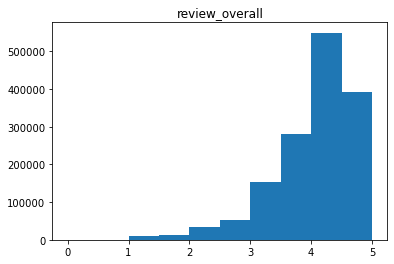

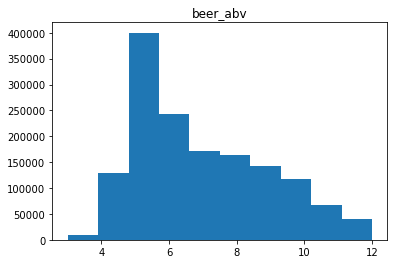

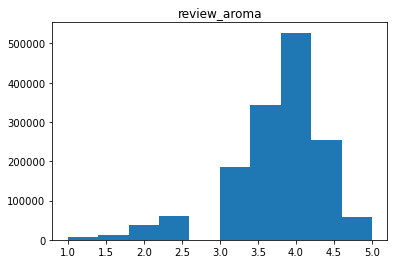

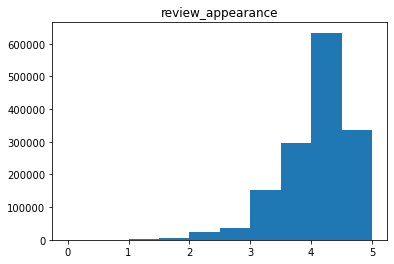

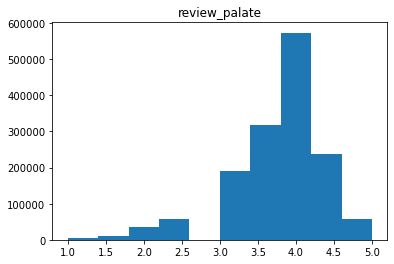

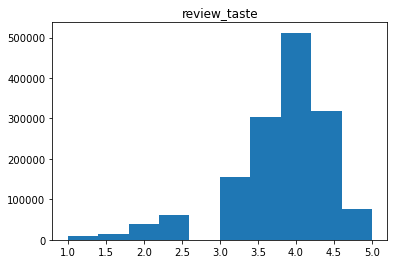

In [16]:
continuous_variables = ['brewery_id', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']


plt.hist(df['review_overall'])
plt.title('review_overall')
plt.show()

plt.hist(df['beer_abv'])
plt.title('beer_abv')
plt.show()

plt.hist(df['review_aroma'])
plt.title('review_aroma')
plt.show()

plt.hist(df['review_appearance'])
plt.title('review_appearance')
plt.show()

plt.hist(df['review_palate'])
plt.title('review_palate')
plt.show()

plt.hist(df['review_taste'])
plt.title('review_taste')
plt.show()

### Takeaways

- beer_abv has a slight right skew.  
- review_overall has a definite left skew, so does review_appearance. Look into this.
- review_taste, review_palate, review_aroma have a relatively universal distribution.
- review_taste and review_palate have nearly identical distribution. I will want to use spearman's correlation test when testing the linear relationships due to the skew.

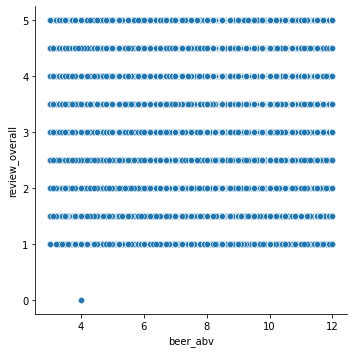

In [19]:
sns.relplot(x=df.beer_abv, y=df.review_overall)

plt.show()

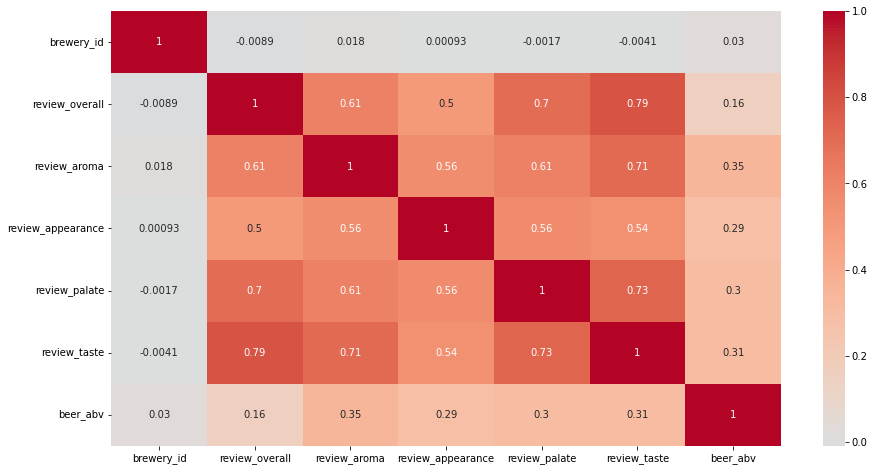

In [20]:
# Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df[continuous_variables].corr(), cmap='coolwarm', center=0, annot=True)
plt.show()

# As we can see here, brewery_id has nothing to do with review_overall (obvisouly).
# BUT, we do see some interesting correlations0

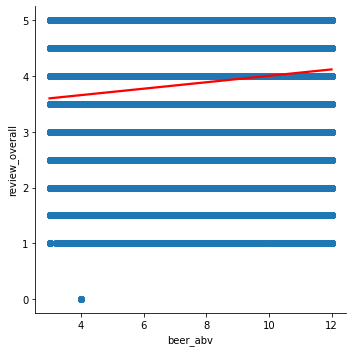

In [21]:
sns.lmplot(x="beer_abv", y="review_overall", data=df, line_kws={'color': 'red'})
plt.show()

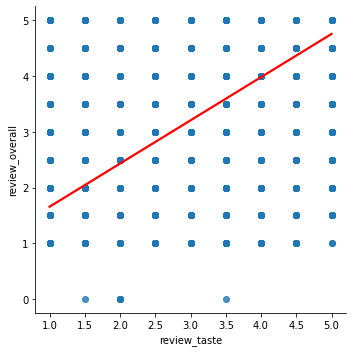

In [22]:
sns.lmplot(x="review_taste", y="review_overall", data=df, line_kws={'color': 'red'})
plt.show()

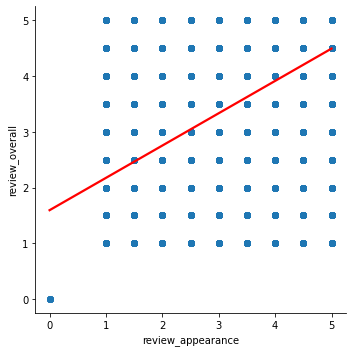

In [23]:
sns.lmplot(x="review_appearance", y="review_overall", data=df, line_kws={'color': 'red'})
plt.show()

# clean that outlier up

In [24]:
# splitting the data into train, validate, and test
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

(831942, 7) (356547, 7) (297123, 7)


In [25]:
# setting independent/dependent variables in ea. sub-dataset

x_train = train.drop(columns=["review_overall"])
y_train = train.review_overall

x_validate = validate.drop(columns=["review_overall"])
y_validate = validate.review_overall

x_test = test.drop(columns=["review_overall"])
y_test = test.review_overall

# Write README and plan down. 

You can use your expertise to determine ABV outliers. 
Ask for IBU.
Ask for geography. If you had the location of the breweries, you'd be able to tell that data.
Do the accuracy sensitivity thing.
Linear correlation with reivew_overall. What should the brewery focus on?
What affects taste? What affects visual appearance?

## Multivariate Exploration

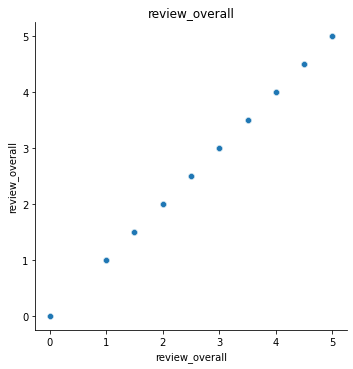

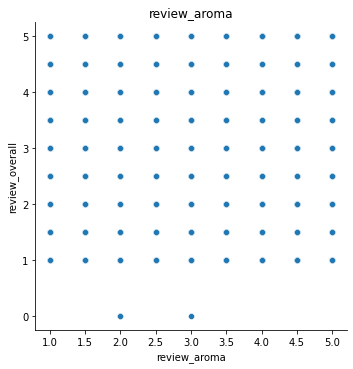

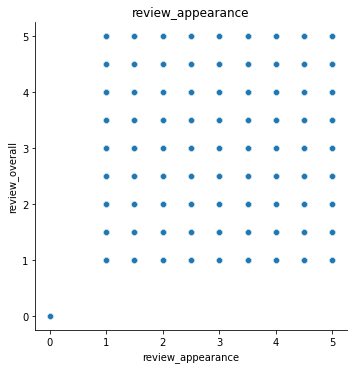

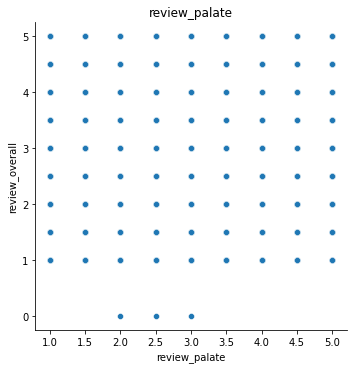

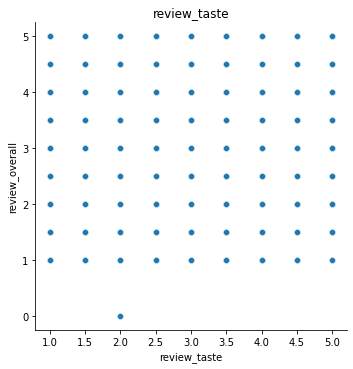

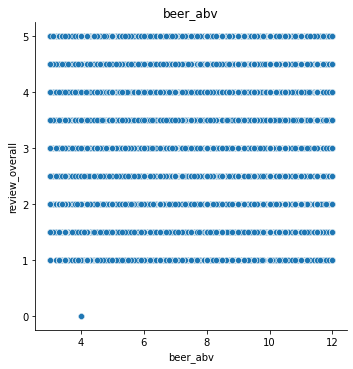

In [26]:
continuous_variables = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']

for col in train[continuous_variables]:
    sns.relplot(x=train[col], y=train.review_overall)
    plt.title(col)
    plt.show()

## Questions to explore:

2. Is review_taste score connected to the review_overall score?
3. Does beer_abv have any correlation with the overall review score?
4. Are review_taste and review_palate the same thing or what?
    - Because they look and sound exactly the same.
5. Variables "review_taste" and "review_aroma" why are they so strongly correlated?


#### Question 2. Is review_taste score connected to the review_overall score?

Null Hypothesis: review_taste is independent of review_overall.

Alternate Hypothesis: review_taste is correlated with review_overall.

Alpha =0.01

In [27]:
# Calculate Pearson Correlation Coefficient for review_taste/review_overall comparison

x = x_train.review_taste
y = y_train

corr, p = stats.pearsonr(x, y)
corr, p

(0.7880132602404446, 0.0)

In [28]:
### Decide whether to reject or accept the null hypothesis

if p < 0.01:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Reject Null Hypothesis


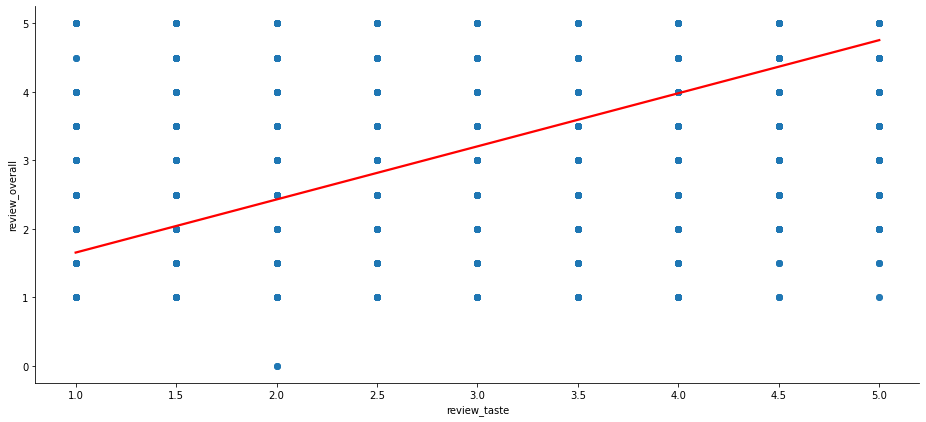

In [29]:
taste_and_overall = sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}}, x_vars = ['review_taste'],
                 y_vars = ['review_overall'])

taste_and_overall.fig.set_size_inches(16,7)

#### Question 3:  Does beer_abv have any connection to the overall review score?

exam_spearman = train.drop(columns=['student_id']).corr(method='spearman')
exam_spearman

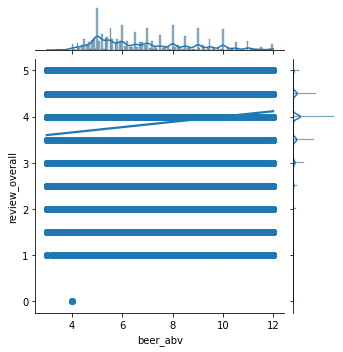

In [30]:
sns.jointplot(x="beer_abv", y="review_overall", data=train,  kind='reg', height=5)
plt.show()

In [61]:
# Since my variables are not normally distributed, I might choose Spearman instead.

beer_spearman = train.drop(columns=['brewery_id','review_aroma',
       'review_appearance', 'review_palate', 'review_taste',
       ]).corr(method='spearman')
beer_spearman

,review_overall,beer_abv
review_overall,1.000000,0.174191
beer_abv,0.174191,1.000000


- Null Hypothesis = There is no relationship between beer_abv and review_overall
- Alternative Hypothesis = There is a relationship with beer_abv and review_overall

In [69]:
# calculate spearman's correlation
coef, p = spearmanr(x_train.beer_abv, y_train.review_overall)
print(coef, p)
#print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

0.21432824407766912 0.0
Samples are correlated (reject H0) p=0.000


## Takeaway
- Although we are rejecting the null, beer_abv has such a low correlation coefficient, we will disregard that when it come to review_overall

#### Question 4.

Are review_taste and review_palate the same thing or what?
    - Because they look and sound exactly the same. I will want to use spearman's correlation test when testing the linear relationships due to the skew.

Null Hypothesis: The mean of review_taste is equal to review_palate.
Alternate Hypothesis: The mean of review_taste is significantly different than review_palate.




In [37]:
print(train.review_taste.var())
print(train.review_palate.var())
alpha = .05


0.5252499225709947
0.4566700972874468


In [38]:
t, p = stats.ttest_ind(train.review_taste, train.review_palate, equal_var=True)
t, p / 2

(45.98564738990016, 0.0)

In [39]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)

if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


is p/2 < alpha?  True
is t > 0?  True
We reject $H_{0}$


In [40]:
# let's generate an average baseline prediction

baseline_prediction = train["review_overall"].mean()
baseline_prediction

3.8243459279613243

In [41]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict review_overall_pred_mean
review_overall_pred_mean = y_train['review_overall'].mean()
y_train['review_overall_pred_mean'] = review_overall_pred_mean
y_validate['review_overall_pred_mean'] = review_overall_pred_mean

# 2. compute review_overall_pred_median
review_overall_pred_median = y_train['review_overall'].median()
y_train['review_overall_pred_median'] = review_overall_pred_median
y_validate['review_overall_pred_median'] = review_overall_pred_median

# 3. RMSE of review_overall_pred_mean
rmse_train = mean_squared_error(y_train.review_overall, y_train.review_overall_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.review_overall, y_validate.review_overall_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of review_overall_pred_median
rmse_train = mean_squared_error(y_train.review_overall, y_train.review_overall_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.review_overall, y_validate.review_overall_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))



## Put this next to baseline

RMSE using Mean
Train/In-Sample:  0.71 
Validate/Out-of-Sample:  0.71
RMSE using Median
Train/In-Sample:  0.73 
Validate/Out-of-Sample:  0.73


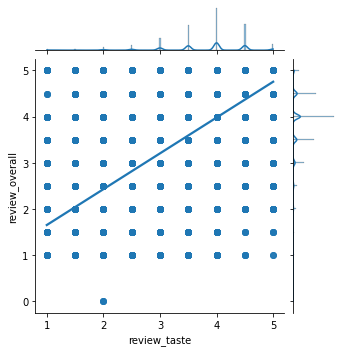

In [42]:
sns.jointplot(x="review_taste", y="review_overall", data=train,  kind='reg', height=5)
plt.show()

### Takeaways
Baseline prediction mean is the predicted overall review average score of all the beers in the  train dataset
Is this the correct average to assume for the dataset?
### Key Findings:
review_taste has a high correlation to review_overall and is the key driver for the score of a beer.
review_palate and review_aroma appear to be connected to the beer's positive review as well with beer_abv being of little consequence.

# Modeling

Text(0.5, 1.0, 'Scaled')

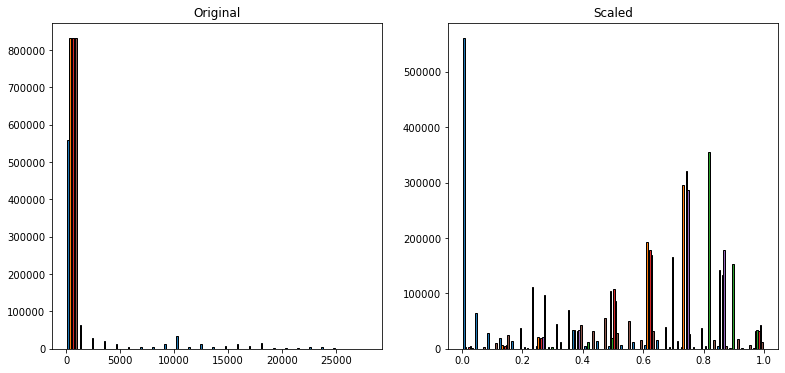

In [45]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [46]:
# creating the model

lm = LinearRegression(normalize = True)
lm.fit(x_train_scaled, y_train.review_overall)
y_train['review_overall'] = lm.predict(x_train_scaled)

In [52]:

# let's create a dataframe with all four (4) features:
# home_value (dependent variable)
# finished_sq_feet (independent variable)
# predicted avg. baseline home value
# created model predictions

# predict train
y_train['review_overall_pred_lm'] = lm.predict(x_train_scaled)

#evaluate: RMSE
rmse_train = mean_squared_error(y_train.review_overall, y_train.review_overall_pred_lm)**(1/2)

# predict validate
y_validate['review_overall_pred_lm'] = lm.predict(x_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.review_overall, y_validate.review_overall_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)



# just use x train

#df = pd.concat([x_train_scaled, y_train], axis = 1)
#lm_df = df.copy().reset_index(drop = True)

#lm_df["baseline"] = baseline_predictions

RMSE for OLS using LinearRegression
Training/In-Sample:  0.0 
Validation/Out-of-Sample:  0.409688650223883


In [48]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(x_train_scaled, y_train.review_overall)

# predict train
y_train['review_overall_pred_lars'] = lars.predict(x_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.review_overall, y_train.review_overall_pred_lars)**(1/2)

# predict validate
y_validate['review_overall_pred_lars'] = lars.predict(x_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.review_overall, y_validate.review_overall_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  0.5838810630246742 
Validation/Out-of-Sample:  0.7131881375527451


In [49]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(x_train_scaled, y_train.review_overall)

# predict train
y_train['review_overall_pred_glm'] = glm.predict(x_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.review_overall, y_train.review_overall_pred_glm)**(1/2)

# predict validate
y_validate['review_overall_pred_glm'] = glm.predict(x_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.review_overall, y_validate.review_overall_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  0.07554060365014124 
Validation/Out-of-Sample:  0.4236598025095658


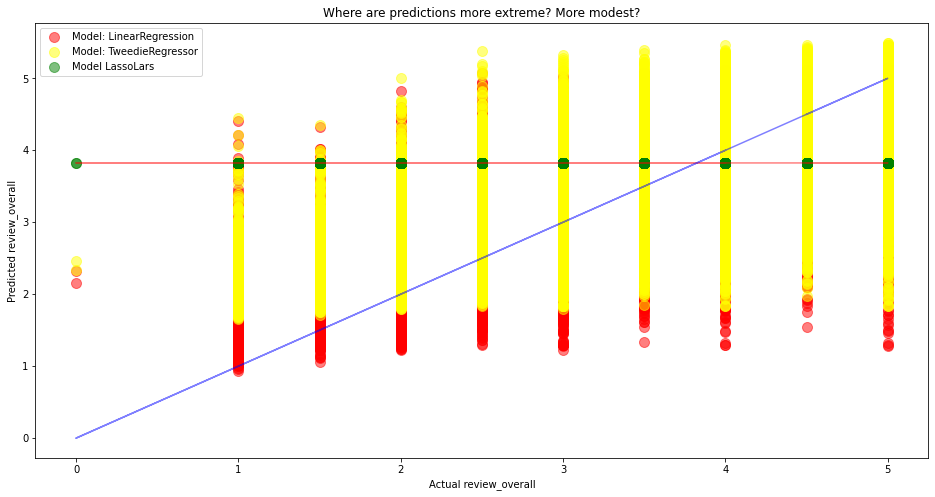

In [53]:
# Evaluate
# Plotted Actual vs. Predicted Values

# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.review_overall, y_validate.review_overall_pred_mean, alpha=.5, color="red", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (400000, 500000))
plt.plot(y_validate.review_overall, y_validate.review_overall, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (1000000, 800000), rotation=15.5)

plt.scatter(y_validate.review_overall, y_validate.review_overall_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.review_overall, y_validate.review_overall_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.review_overall, y_validate.review_overall_pred_lars, 
            alpha=.5, color="green", s=100, label="Model LassoLars")
plt.legend()
plt.xlabel("Actual review_overall")
plt.ylabel("Predicted review_overall")
plt.title("Where are predictions more extreme? More modest?")
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (500000, 3000000))
plt.show()


### Create markdown with conclusions

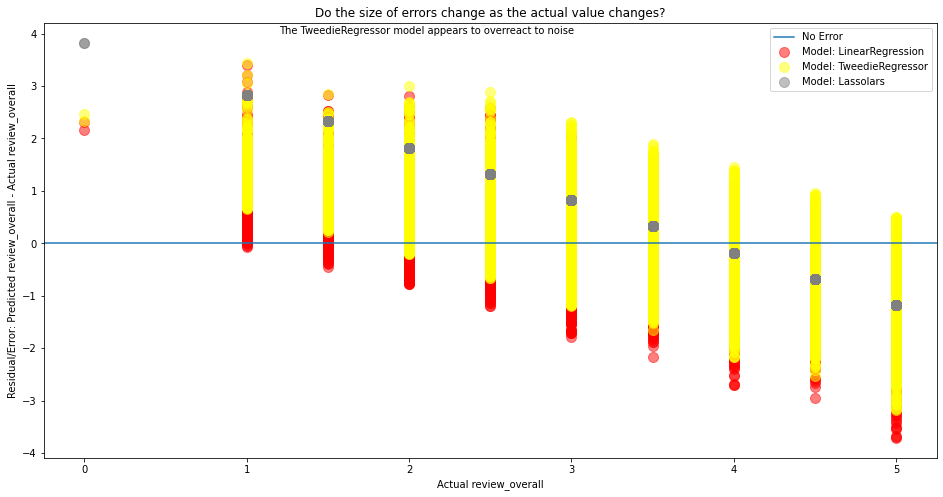

In [54]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.review_overall, y_validate.review_overall_pred_lm-y_validate.review_overall, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.review_overall, y_validate.review_overall_pred_glm-y_validate.review_overall, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.review_overall, y_validate.review_overall_pred_lars-y_validate.review_overall, 
            alpha=.5, color="gray", s=100, label="Model: Lassolars")
plt.legend()
plt.xlabel("Actual review_overall")
plt.ylabel("Residual/Error: Predicted review_overall - Actual review_overall")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The TweedieRegressor model appears to overreact to noise", (1.2, 4))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (500000, 3000000))
plt.show()

### Model Selection & Out-of-Sample Evaluation

RMSE for OLS using LinearRegression

- Training/In-Sample: 0
- Validation/Out-of-Sample: 0.409688650223883

RMSE for Lasso + Lars

- Training/In-Sample:  0.5838810630246742 
- Validation/Out-of-Sample:  0.7131881375527451

RMSE for GLM using Tweedie, power=1 & alpha=0

- Training/In-Sample:  0.07554060365014124 
- Validation/Out-of-Sample:  0.4236598025095658

In [72]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['review_overall_pred_glm'] = glm.predict(x_test_scaled)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.review_overall, y_test.review_overall_pred_glm)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  0.42258894982438566


# Conclusion

Beer’s overall high score is determined by the beer’s taste, palate, aroma and appearance. Beer abv has little to do with a positive review. If there was more time, I would perform a clustering model to see if we can predict a beers missing abv by its beer type. Also, it would be useful to have a brewery ID key in order to determine where the beers are from. Sales data would help to determine what styles of beers sell more and where they sell more.

My recommendation is to focus on the taste of a beer with paying special attention to its aroma as well. Beer abv is of little relevance to a beers actual taste and should be disregarded for the most part.

If I had more time, I would perform an ANOVA test on beer_abv against beer_type to see if we can determine if some beer's style have a higher abv.

## Summary of Analysis:
- I chose Tweedie regressor model because it obliterated the competition with its RMSE.
- review_taste, review_palate, review_aroma, and review_taste all correlate with review_overall.
- Beer_abv has little, if anything to do with the overall review score.
- My test model ended up outperforming the train and validate datasets.

### If I had more time:
- I would create a cluster model to determine if beer_abv can determine beer_style's.
- Request IBU (international bitterness units) for each beer and determine correlation with variables.
- Request a brewery ID key to determine geography.
- Request sales figures.

### Recommendations:

- Forget about beer_abv. People don't associate the alcohol level of the beer with its overall taste. Focus on the taste and the nose of the beer. You can add floral hops so that people rate the beer higher. Also, small batch beers have a better head, therefore increasing the beers overall appearance.
